In [2]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Read Data
cancer_df = pd.read_csv("E:/DIU/6th Semestar/Artificial Intelligence Lab/Lab Resourses/Lab04/breast_cancer_dataframe.csv")
cancer_df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


# Tree based Feature Importance

In [24]:
def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create A DataFrame using Dictionary:
    dict = {"Feature_names":feature_names,"Feature_Importance":feature_importance}
    first_df = pd.DataFrame(dict)

    #sort dataframe in order to decreasing feature importance 
    first_df.sort_values(by=['Feature_Importance'],ascending = False,inplace = True)

    #Draw Chart
    sns.barplot(x = first_df["Feature_Importance"], y = first_df["Feature_names"])
    plt.title(model_type+"Feature Importance")
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Names")

    return first_df
    
    




In [13]:
x = cancer_df.drop(["target"],axis = 1)
y = cancer_df["target"]

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [29]:
rf.feature_importances_

array([0.02595064, 0.01505255, 0.05188306, 0.061694  , 0.00476586,
       0.01344912, 0.06791714, 0.12046063, 0.00327899, 0.00296568,
       0.01898525, 0.00351824, 0.01515798, 0.01904694, 0.00454779,
       0.0054642 , 0.01048789, 0.00672282, 0.00450514, 0.0056157 ,
       0.11899344, 0.01574425, 0.10915705, 0.08886269, 0.01495344,
       0.01402376, 0.0255692 , 0.13490475, 0.00936507, 0.00695675])

,Feature_names,Feature_Importance
27,worst concave points,0.134905
7,mean concave points,0.120461
20,worst radius,0.118993
22,worst perimeter,0.109157
23,worst area,0.088863
6,mean concavity,0.067917
3,mean area,0.061694
2,mean perimeter,0.051883
0,mean radius,0.025951
26,worst concavity,0.025569


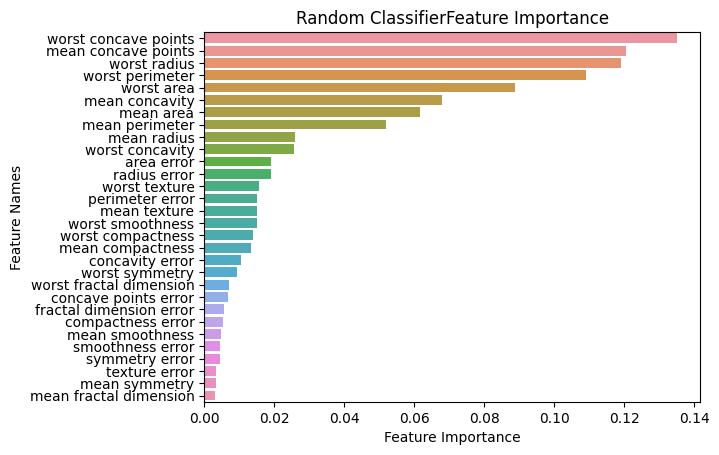

In [30]:
plot_feature_importance(rf.feature_importances_,x.columns,"Random Classifier")

In [32]:
x = cancer_df.drop(['target' ,
'worst smoothness' ,
'worst symmetry' ,
'mean smoothness' ,
'worst fractal dimension' ,
'radius error' ,
'concave points error' ,
'fractal dimension error' ,
'mean compactness' ,
'symmetry error' ,
'texture error' ,
'smoothness error' ,
'concavity error' ,
'compactness error' ,
'mean fractal dimension' ,
'mean symmetry'],
axis = 1)
y = cancer_df[ 'target']

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)


In [34]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
pred_rf = rf.predict(xtest)
rf.score(xtest,ytest)

0.9736842105263158

# CHI Square

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [36]:
x = cancer_df.drop(['target'],axis = 1)
y = cancer_df['target']

In [38]:
bestfeatures = SelectKBest(score_func = chi2,k = 10)
fit = bestfeatures.fit(x,y)


In [48]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
new_df = pd.concat([dfcolumns,dfscores],axis = 1)
new_df.columns = ["Specs","Score"]

In [49]:
print(new_df.nlargest(25,"Score"))

                      Specs          Score
23               worst area  112598.431564
3                 mean area   53991.655924
13               area error    8758.504705
22          worst perimeter    3665.035416
2            mean perimeter    2011.102864
20             worst radius     491.689157
0               mean radius     266.104917
12          perimeter error     250.571896
21            worst texture     174.449400
1              mean texture      93.897508
26          worst concavity      39.516915
10             radius error      34.675247
6            mean concavity      19.712354
25        worst compactness      19.314922
27     worst concave points      13.485419
7       mean concave points      10.544035
5          mean compactness       5.403075
28           worst symmetry       1.298861
16          concavity error       1.044718
15        compactness error       0.613785
24         worst smoothness       0.397366
17     concave points error       0.305232
8          

# Co-Relation Analysis

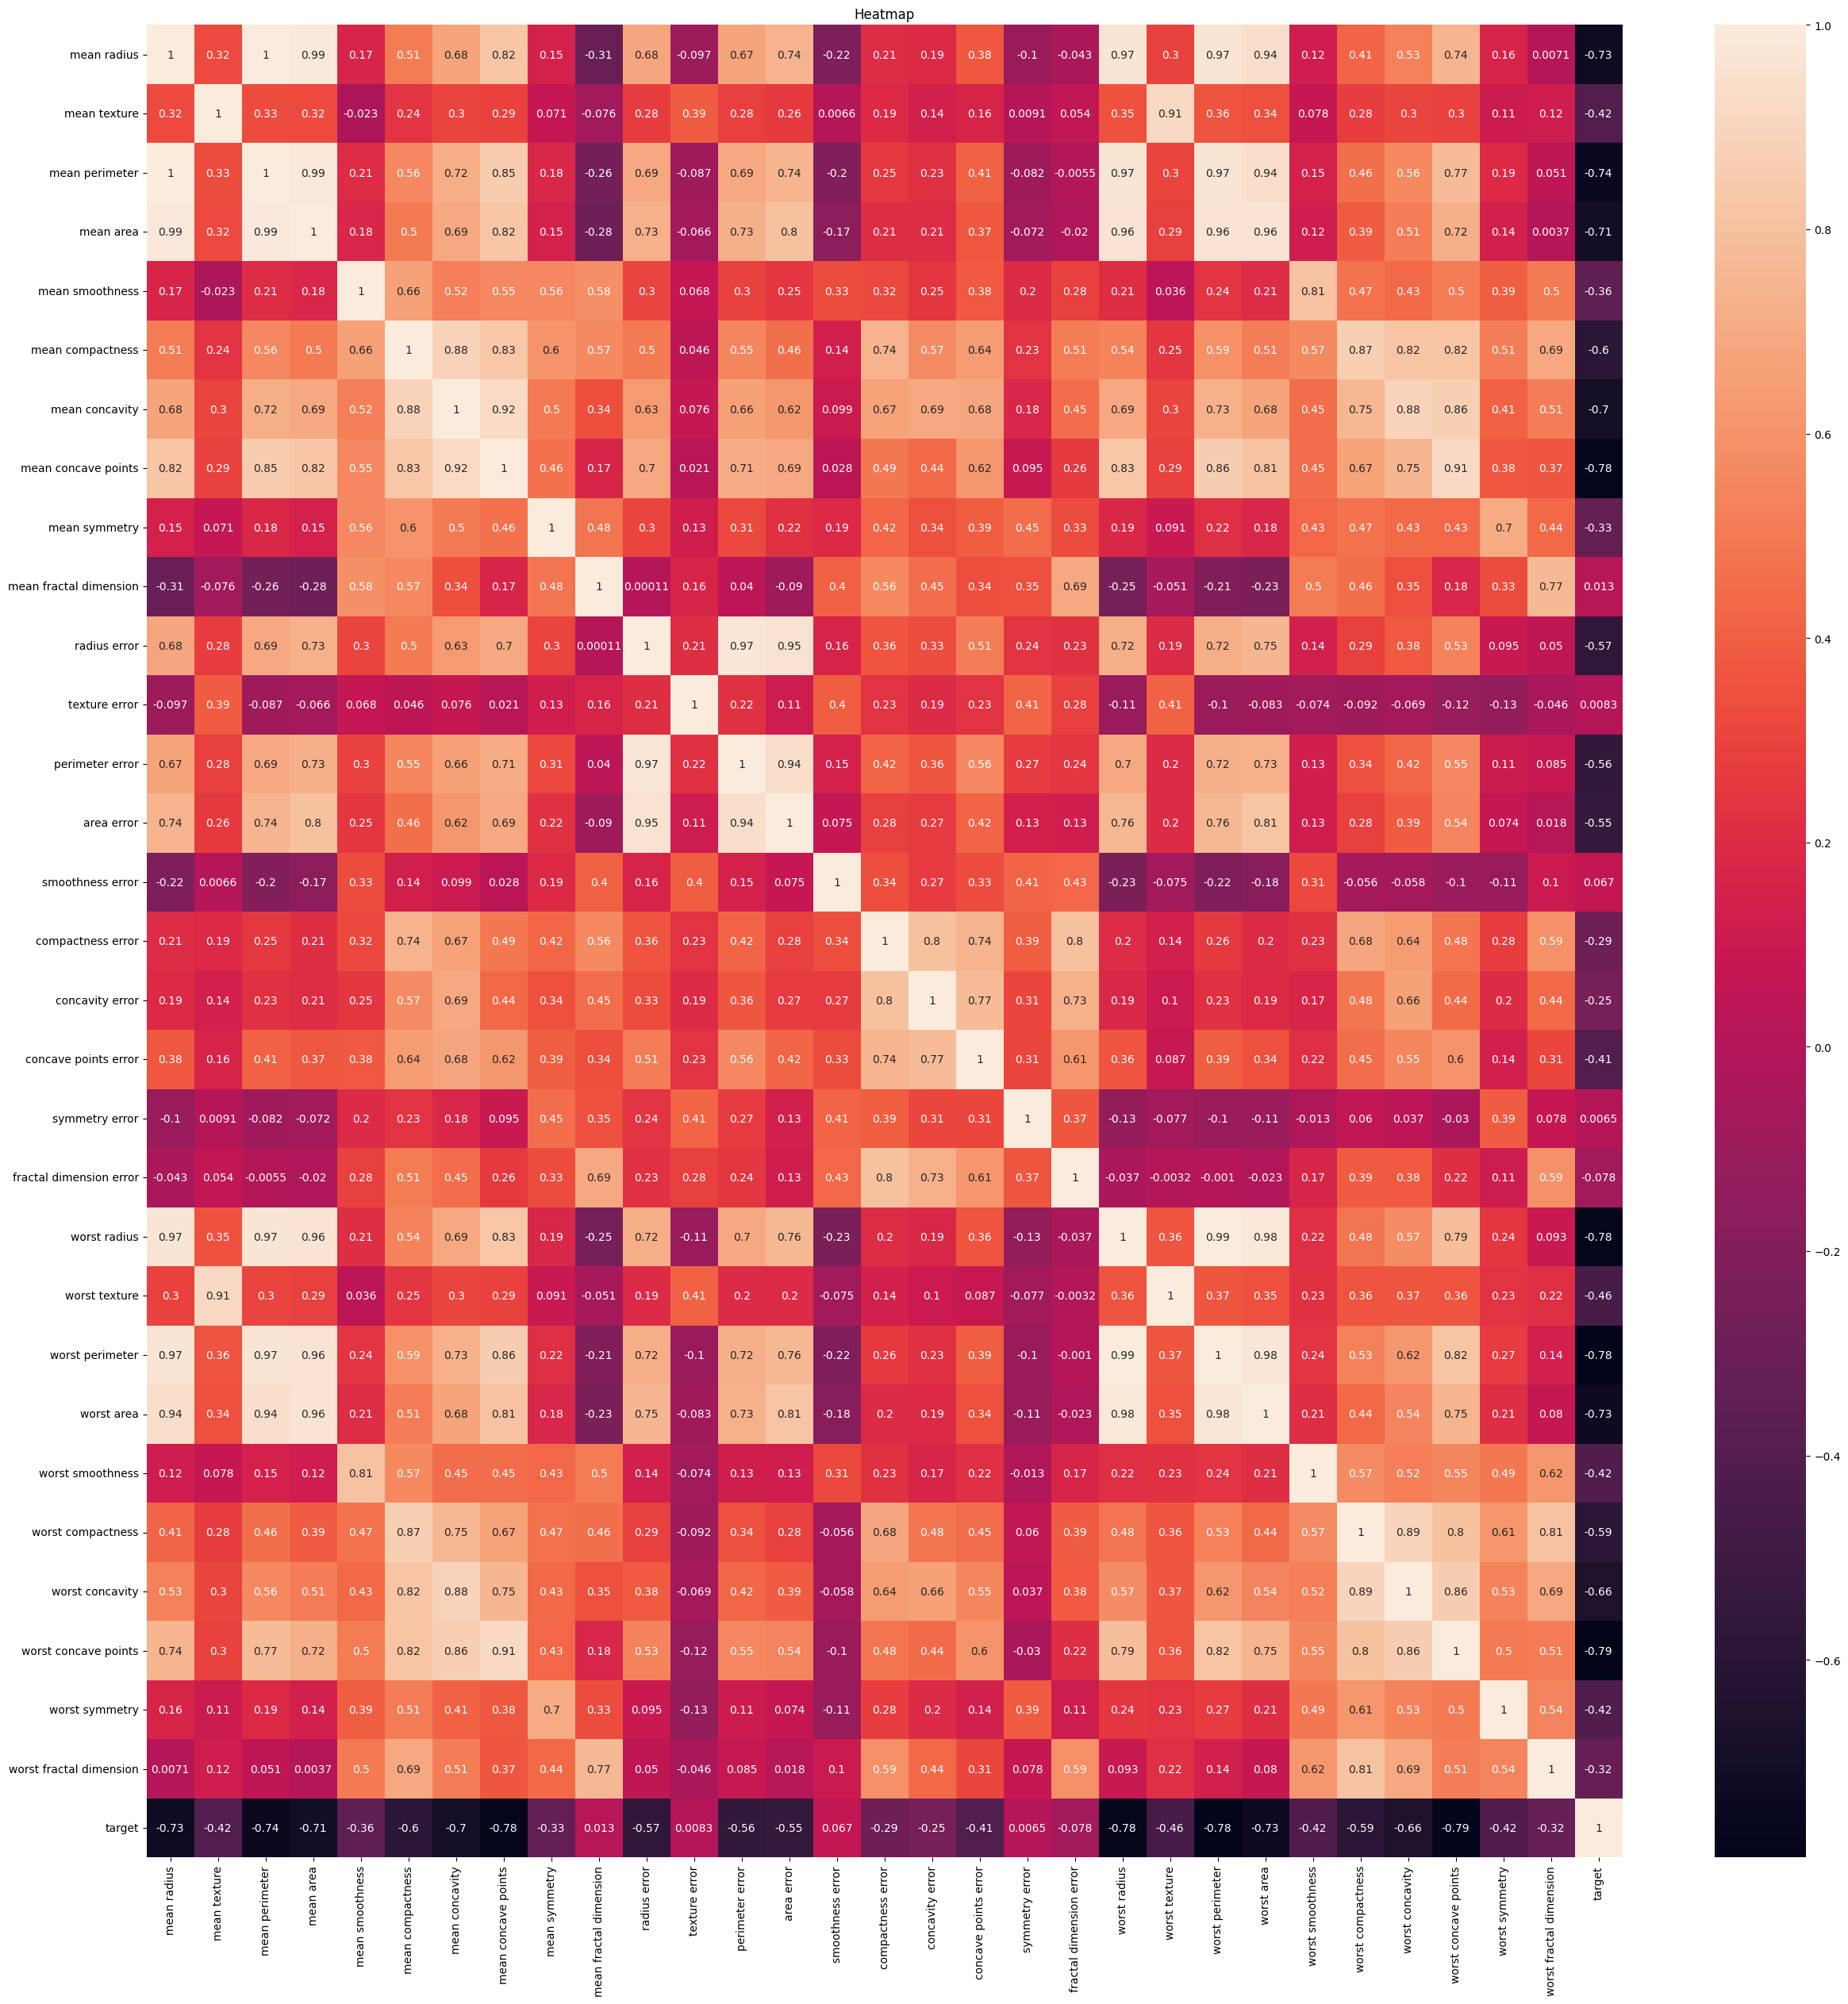

In [58]:
plt.figure(1,figsize = (30,30))
sns.heatmap(cancer_df.corr(),annot = True)
plt.title("Heatmap")
plt.show()

In [55]:
#Getting the names of Columns: 
def corelation(dataset,th):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>th):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr



In [57]:
corr_features = corelation(cancer_df,0.8)
corr_features

{'area error',
 'concavity error',
 'fractal dimension error',
 'mean area',
 'mean concave points',
 'mean concavity',
 'mean perimeter',
 'perimeter error',
 'worst area',
 'worst compactness',
 'worst concave points',
 'worst concavity',
 'worst fractal dimension',
 'worst perimeter',
 'worst radius',
 'worst smoothness',
 'worst texture'}